<h1>Build a custom classification model from your mortgage documents</h1>

A powerful feature in Amazon Comprehend is Custom Document Classification. This is where we provide Amazon Comprehend a training dataset in the form of a csv file with 1 column being a class, or in our scenario a mortgage document name, and in the in the next column the text we wish to train our model on, for the most part it is just an extract of the document itself. This is especially pertinent in the mortgage processing space documents tend to have multiple workflow types, and identifying the class of a document becomes key.

**Please run through the steps in the workshop guide to generate your classification model**. While we wait for our model to train lets test a pre-trained model.Below is an architecture diagram of how we built our document classification model.

![Document Classification Workflow.png](attachment:Document Classification Workflow.png)
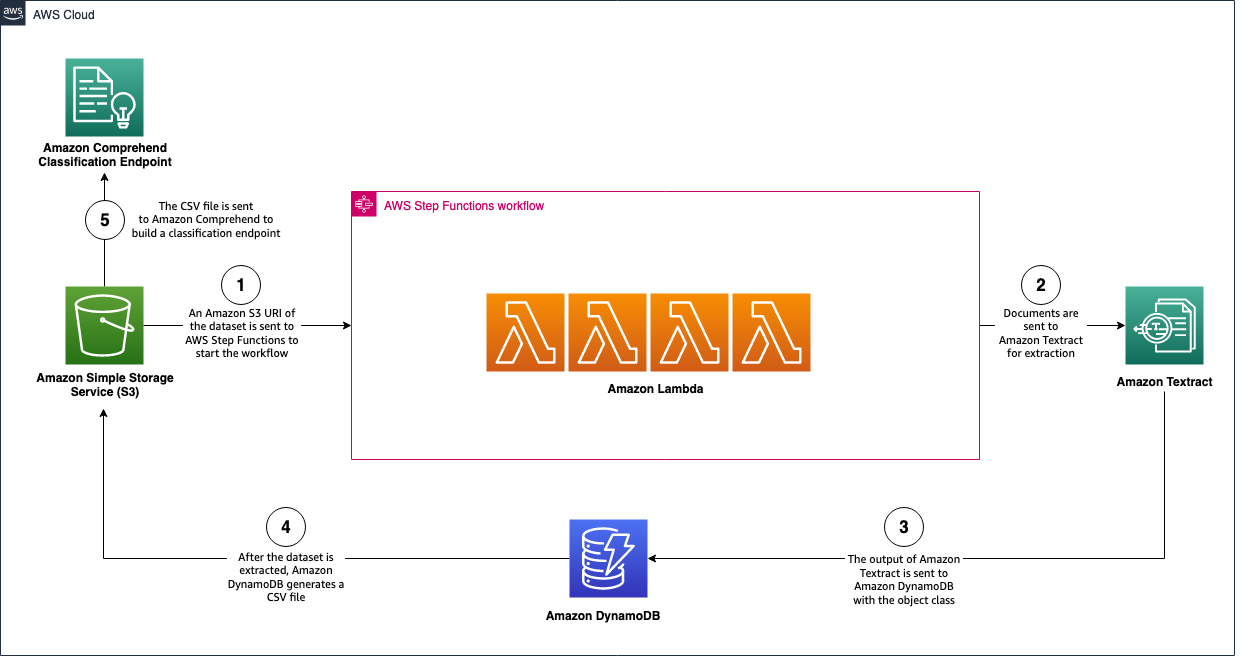

In [1]:
import boto3
import requests
import json
!python -m pip install amazon-textract-prettyprinter
from textractprettyprinter.t_pretty_print import get_lines_string

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [2]:
#intialize the connection to Amazon Textract and Amazon Comprehend with Boto3
textract = boto3.client('textract')
comprehend = boto3.client('comprehend')

In [3]:
document = "w2example.jpg"

<h1> Sending Document to Textract

In [4]:
#sending the Document to Amazon Textract 
with open(document, 'rb') as document:
    imageBytes = bytearray(document.read())

textract_response = textract.detect_document_text(Document={'Bytes': imageBytes})

In [5]:
#Post-Process the response using Textract Response Parser 
classification_text = get_lines_string(textract_json=textract_response)
print(classification_text)

a Employee's social security number
22222
054-22-1254
OMB No. 1545-0008
b Employer identification number (EIN)
1 Wages, tips, other compensation
2 Federal income tax withheld
23-222223
285,000
16,304
c Employer's name, address, and ZIP code
3 Social security wages
4 Social security tax withheld
Acme Technology Industries
6,033
5 Medicare wages and tips
6 Medicare tax withheld
2205 7th Ave
2,000
7 Social security tips
8 Allocated tips
Seattle
WA
98121
d Control number
9
10 Dependent care benefits
0111
e Employee's first name and initial
Last name
Suff.
11 Nonqualified plans
12a
C
Kennedy
M
Fields
a
e
13 Statutory
Retirement
Third-party
12b
47 168th Ave NE
employee
plan
sick pay
C
o
e
14 Other
12c
C
o
Redmond
WA
98052
e
12d
C
4256586694
e
f Employee's address and ZIP code
15 State Employer's state ID number
16 State wages, tips, etc.
17 State income tax
18 Local wages, tips, etc.
19 Local income tax
20 Locality name
WA
22-888788-22
105,000
8032.50
Form
W-2
Wage and Tax Statement
2020
Dep

<h1> Sending Documents to Comprehend Classification </h1>

<h3>We have created a pre-built classification endpoint for you to try with the sample docs while your model is training</h3>
    

In [7]:
#Send Results to Pre-Trained Model Endpoint 
endpoint_url = "https://uctwj7mbwu.us-east-1.awsapprunner.com/classifydoc"

payload = json.dumps({
  "classification_text": classification_text
})
headers = {
  'Content-Type': 'application/json'
}

response = requests.request("POST", endpoint_url, headers=headers, data=payload)

print("The class of the form is " + response.text)

ConnectionError: HTTPSConnectionPool(host='uctwj7mbwu.us-east-1.awsapprunner.com', port=443): Max retries exceeded with url: /classifydoc (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f2a60e4cb90>: Failed to establish a new connection: [Errno -2] Name or service not known'))

<h3>Once your model is completed training put the model endpoint ARN into the endpoint_arn field</h3>

In [ ]:
#send results to self-trained Comprehend Classifier, please insert your Model Endpoint ARN
endpoint_arn = "{Enter_Your_Endpoint_ARN}"
comprehend_response = comprehend.classify_document(Text= classification_text,EndpointArn=endpoint_arn)
predicted_class = comprehend_response['Classes'][0]['Name']
print("The class of the form is " + predicted_class)